# Save high-scoring tokens for SAUR cohort

In [1]:
import pandas as pd


pd.set_option("display.max_columns", None) # show all cols
pd.set_option('display.max_colwidth', None) # show full width of showing cols
pd.set_option("display.expand_frame_repr", False) # print cols side by side as it's supposed to be

## Read token information from bed files

In [2]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files', 'SAUR')

bedDfList = []
for bedFile in os.listdir(bedDir):
    tubeid = bedFile.split('.')[0].split('_')[0]
    tokensDf = pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score'])
    tokensDf['tube_id'] = tubeid
    bedDfList.append(tokensDf)

bedDf = pd.concat(bedDfList, ignore_index=True)
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id
0,1,0,6,TTTTCTT,0.000064,ALF22G140
1,1,7,9,ACC,-0.000395,ALF22G140
2,1,10,13,GACA,0.001573,ALF22G140
3,1,14,18,AGAAT,-0.000986,ALF22G140
4,1,19,25,TAATTAT,0.000795,ALF22G140
...,...,...,...,...,...,...
176721937,5,181665,181667,CGG,-0.002273,AH21C044
176721938,5,181668,181673,CTCATC,-0.001735,AH21C044
176721939,5,181674,181676,GCA,-0.003468,AH21C044
176721940,5,181677,181680,TCCA,-0.000228,AH21C044


<Axes: >

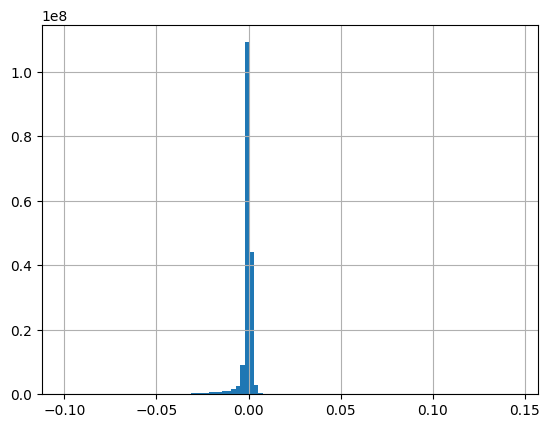

In [3]:
bedDf[(bedDf.score > -0.1) & (bedDf.score < 0.15)].score.hist(bins=100)

In [4]:
bedDf['token_length'] = bedDf.tokens.apply(lambda x: len(x))
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
0,1,0,6,TTTTCTT,0.000064,ALF22G140,7
1,1,7,9,ACC,-0.000395,ALF22G140,3
2,1,10,13,GACA,0.001573,ALF22G140,4
3,1,14,18,AGAAT,-0.000986,ALF22G140,5
4,1,19,25,TAATTAT,0.000795,ALF22G140,7
...,...,...,...,...,...,...,...
176721937,5,181665,181667,CGG,-0.002273,AH21C044,3
176721938,5,181668,181673,CTCATC,-0.001735,AH21C044,6
176721939,5,181674,181676,GCA,-0.003468,AH21C044,3
176721940,5,181677,181680,TCCA,-0.000228,AH21C044,4


In [5]:
len(bedDf.tokens.unique())

3894

In [6]:
highscoreCutoff = bedDf.score.mean() + 3 * bedDf.score.std()
highscoreCutoff

np.float64(0.012133979502852287)

In [7]:
highscoreDf = bedDf[(bedDf.score > highscoreCutoff) & (bedDf.token_length > 5)]
highscoreDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
13703,1,75447,75454,TATACTTT,0.013623,ALF22G140,8
13725,1,75567,75572,CCTGAG,0.015546,ALF22G140,6
13753,1,75724,75731,CTGCACCC,0.018303,ALF22G140,8
13800,1,75977,75982,AGGGAA,0.020379,ALF22G140,6
13834,1,76167,76174,TCAATAAA,0.024790,ALF22G140,8
...,...,...,...,...,...,...,...
176698405,5,50494,50499,CCTTTT,0.014881,AH21C044,6
176698428,5,50610,50616,ATAGTAT,0.015281,AH21C044,7
176698433,5,50635,50641,AATGTTT,0.016897,AH21C044,7
176698513,5,51074,51079,GGCGCG,0.015019,AH21C044,6


In [8]:
len(highscoreDf.tokens.unique())

1374

In [9]:
highscoreDf.shape

(174753, 7)

<Axes: >

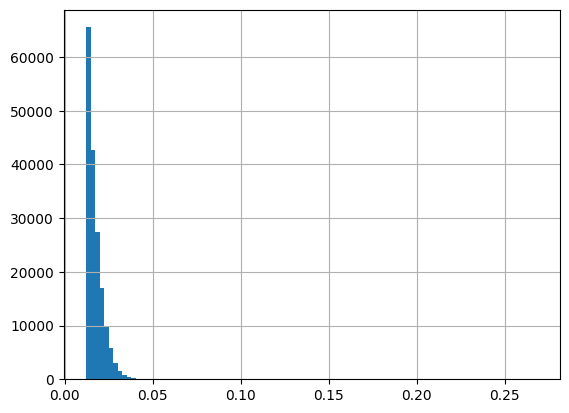

In [10]:
highscoreDf[(highscoreDf.score < 0.3)].score.hist(bins=100)

In [11]:
highscoreDf.token_length.value_counts()

token_length
6     104579
7      51246
8      16706
9       1348
10       798
13        73
11         3
Name: count, dtype: int64

<Axes: xlabel='token_length', ylabel='Count'>

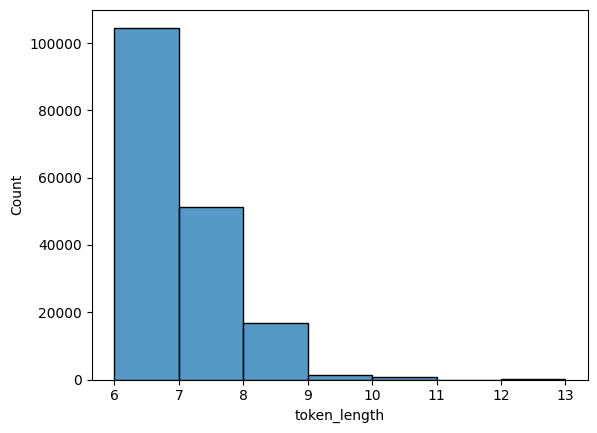

In [12]:
import seaborn as sns

sns.histplot(highscoreDf.token_length, binwidth=1)

## Create a dataframe containing tokens

In [13]:
import pandas as pd


df = pd.DataFrame(highscoreDf.tokens.unique())
df

,0
0,TATACTTT
1,CCTGAG
2,CTGCACCC
3,AGGGAA
4,TCAATAAA
...,...
1369,GCCAAG
1370,TTTCTTTTTT
1371,TGGGAAT
1372,TAGAGT


## Save the dataframe to a file

In [14]:
import os
from pathlib import Path


df.to_csv(Path(os.environ['EHR_DATA_BASE'], 'data', 'full_cohort', 'saur_high_score_tokens.csv'), index=False, header=None)